In [1]:
import numpy as np
import matplotlib.pyplot as plt

#%pylab inline --no-import-all
np.random.seed(0)

import logging
LOGGER = logging.getLogger(__name__)

from pynhhd import create_logger
create_logger(logging.INFO)

# -----------------------------------------------------            
# create a regular grid

# assume the grid [-1,-1] to [1,1]
gextents = ([-1,1],[-1,1])

# number of grid points (Y,X)
gdims = (101 ,101)

# centered at the mid vertex
gcent = ( (gdims[0]-1)/2, (gdims[1]-1)/2 )

# (dy,dx)
gdx = ((gextents[0][1]-gextents[0][0]) / (gdims[0]-1.), 
       (gextents[1][1]-gextents[1][0]) / (gdims[1]-1.))

LOGGER.info('grid = {}, {}, {}'.format(gextents, gdims, gdx))
LOGGER.info('gcent = {}'.format(gcent))

# -----------------------------------------------------            
# create a function on regular grid and some unstructured points 

k = 0.2

f = np.zeros(gdims)
for y in range(gdims[0]):
    for x in range(gdims[1]):
        
        p = [gdx[0]*(y-gcent[0]), gdx[1]*(x-gcent[1])]
        if np.linalg.norm(p) < k:
            f[y,x] = 1

LOGGER.info('f = {}, {}, {}'.format(f.shape, f.min(), f.max()))

# -----------------------------------------------------            
# unstructured points
n_points = gdims[0]*gdims[1]
ux = np.random.rand(n_points, 2)

# translate from [0,1] to gextents
for d in range(2):
    ux[:,d] = ux[:,d]*(gextents[d][1]-gextents[d][0]) + gextents[d][0]
LOGGER.info('ux = {}, {}, {}'.format(ux.shape, ux.min(), ux.max()))

uf = np.zeros(n_points)
srad = np.linalg.norm(ux, axis=1)
uf[ srad < k ] = 1
LOGGER.info('uf = {}, {}, {}'.format(uf.shape, uf.min(), uf.max()))

# -----------------------------------------------------            
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# display the function
ax1 = axs[0]
im = ax1.imshow(f, origin='lower')
fig.colorbar(im, ax=ax1)

# display the function
ax2 = axs[1]
im = ax2.scatter(ux[:,0], ux[:,1], c=uf)
fig.colorbar(im, ax=ax2)

ax2.set_xlim(gextents[1][0], gextents[1][1])
ax2.set_ylim(gextents[0][0], gextents[0][1])
ax2.set_aspect('equal', 'box')

plt.show()

<Figure size 1200x400 with 4 Axes>

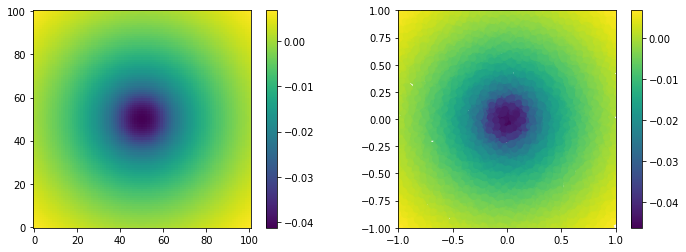

In [2]:
from pynhhd import PoissonSolver, UnstructuredGrid

# -----------------------------------------------------            
# regular grid solver

fsolver = PoissonSolver(solver='F', grid=gdims, spacings=gdx) # F solver is default
fsolver.prepare()
fp = fsolver.solve(f)

LOGGER.info('\tsolution of frequency convolution = {}, {},{}'.format(fp.shape, fp.min(), fp.max()))

# -----------------------------------------------------            
# smesh object computes the point volumes of a delainay triangulation
smesh = UnstructuredGrid(vertices=ux)
LOGGER.info('initialized SMesh and computed point volumes {}'.format(smesh.pvolumes.shape))

psolver = PoissonSolver(points=ux, pvolumes=smesh.pvolumes)
psolver.prepare()
up = psolver.solve(uf)

LOGGER.info('\tsolution of frequency convolution = {}, {},{}'.format(up.shape, up.min(), up.max()))

# -----------------------------------------------------            

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax1 = axs[0]
im = ax1.imshow(fp, origin='lower')
fig.colorbar(im, ax=ax1)


ax2 = axs[1]
im = ax2.scatter(ux[:,0], ux[:,1], c=up)
fig.colorbar(im, ax=ax2)

ax2.set_xlim(gextents[1][0], gextents[1][1])
ax2.set_ylim(gextents[0][0], gextents[0][1])
ax2.set_aspect('equal', 'box')

plt.show()